In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [4]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        labels_a = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 'transformer_mean' in csvFile:
                labels.append("Transformer_mean")
                labels_x.append('Transformer_mean')
                labels_a.append('Transformer_mean')
            elif 'transformer' in csvFile:
                labels.append("Transformer")
                labels_x.append('Transformer')
                labels_a.append('Transformer')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
                labels_a.append('seq2seq')
            elif 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
                labels_a.append('Real')
            elif 'se' in csvFile:
                labels.append("Semantic")
                labels_x.append('Semantic')
                labels_a.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
                labels_a.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & seq2seq " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'transformer_mean' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Transformer_mean " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Transformer_mean " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'transformer' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Transformer " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Transformer " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'transformer_mean' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Transformer_mean & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Transformer_mean & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Transformer_mean & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Transformer_mean & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'transformer' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Transformer & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Transformer & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Transformer & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Transformer & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        labels_a.append("Real & Semantic " + w)
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'transformer_mean' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'transformer' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'transformer_mean' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'transformer' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [5]:
print(df_nmi_23)

     K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
0            0.468          0.468      0.462      0.462
1            0.595          0.595      0.589      0.589
2            0.535          0.535      0.543      0.543
3            0.544          0.544      0.537      0.537
4            0.546          0.546      0.537      0.537
..             ...            ...        ...        ...
109          0.598          0.600      0.597      0.594
110          0.599          0.600      0.598      0.594
111          0.594          0.599      0.599      0.595
112          0.598          0.597      0.597      0.598
113          0.596          0.601      0.591      0.597

[114 rows x 4 columns]


In [6]:
for k, i in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    print(k, i[0], i[1])

0 53 0.354
1 55 0.356
2 54 0.351
3 53 0.359


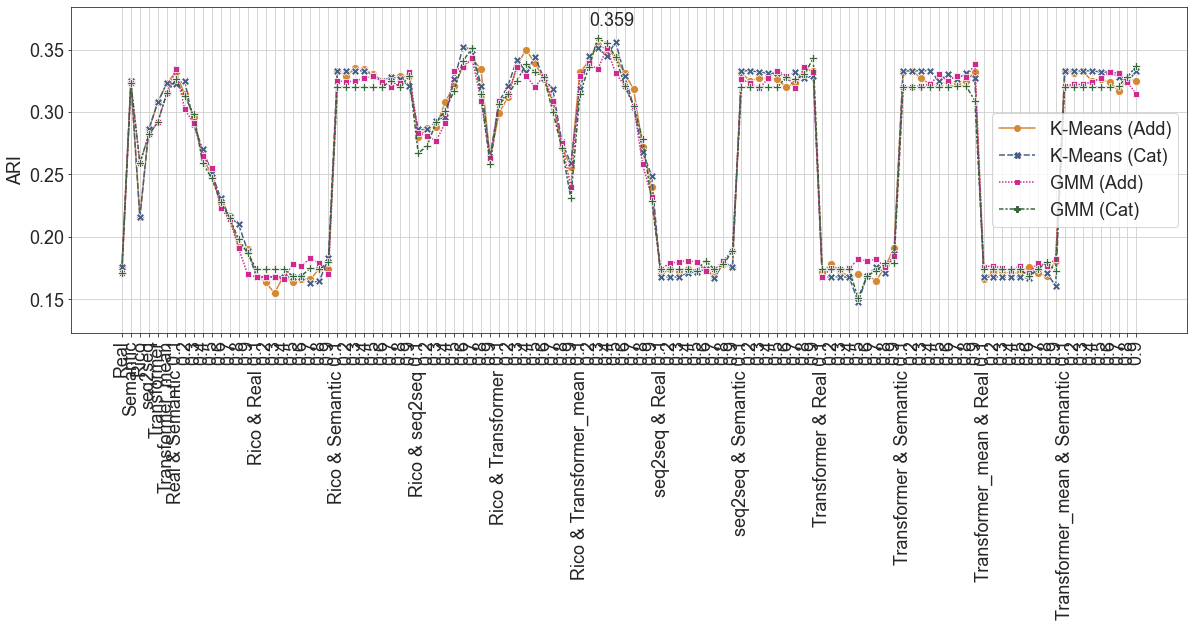

In [7]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
#plt.text(4, 0.104, 'Real & Semantic')
#plt.text(13, 0.104, 'Rico & Real')
#plt.text(22, 0.104, 'Rico & Semantic')
#plt.text(31, 0.104, 'Rico & seq2seq')
#plt.text(40, 0.104, 'seq2seq & Real')
#plt.text(49, 0.104, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.01, str(j[1]))
#plt.savefig('../result/plot_ari_23.png', format='png', bbox_inches='tight', transparent=True)

In [8]:
for k, i in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    print(k, i[0], i[1])

0 27 0.603
1 73 0.601
2 95 0.602
3 77 0.605


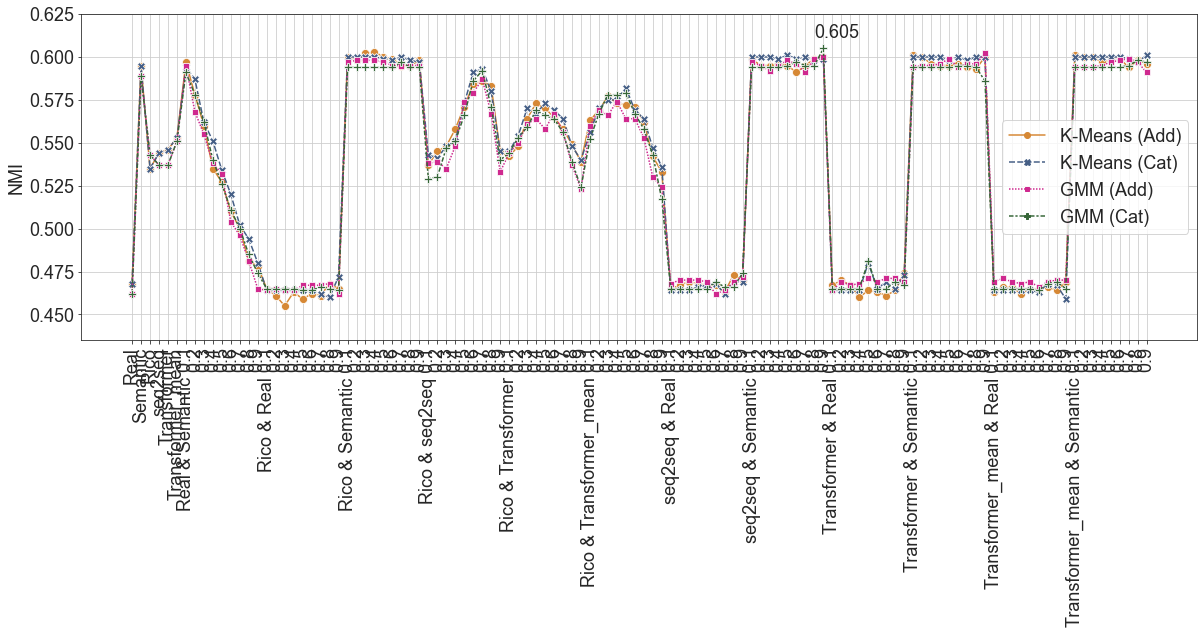

In [9]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
#plt.text(4, 0.411, 'Real & Semantic')
#plt.text(13, 0.411, 'Rico & Real')
#plt.text(22, 0.411, 'Rico & Semantic')
#plt.text(31, 0.411, 'Rico & seq2seq')
#plt.text(40, 0.411, 'seq2seq & Real')
#plt.text(49, 0.411, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_23.png', format='png', bbox_inches='tight', transparent=True)

In [10]:
for k, i in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    print(k, i[0], i[1])

0 54 0.45
1 53 0.451
2 53 0.444
3 53 0.443


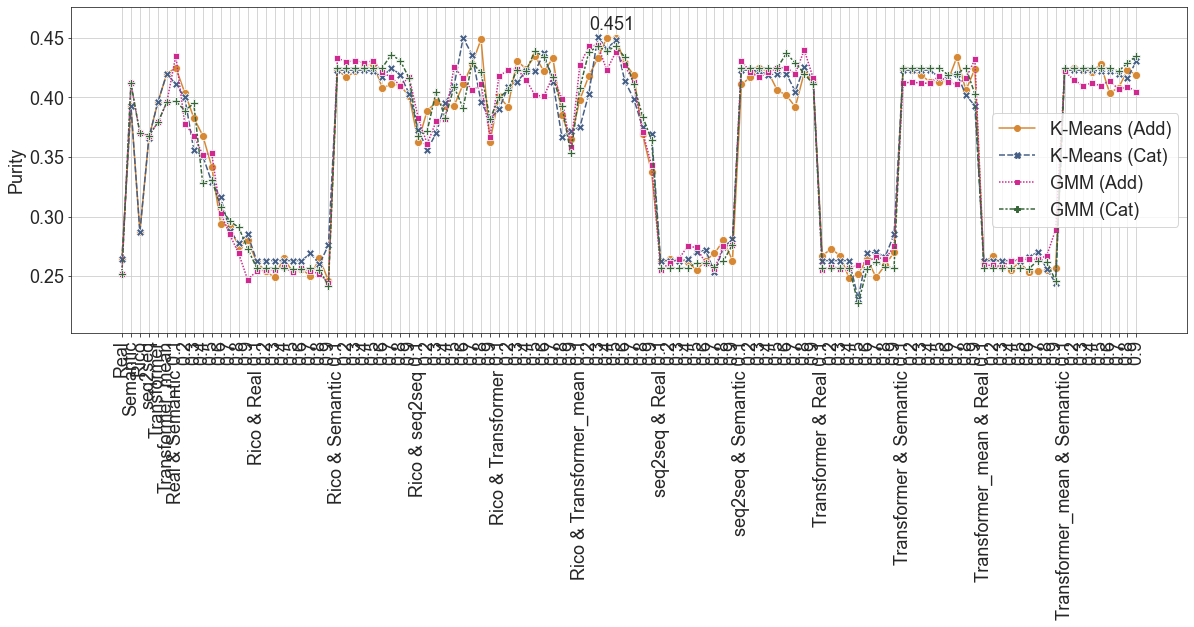

In [11]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
#plt.text(4, 0.166, 'Real & Semantic')
#plt.text(13, 0.166, 'Rico & Real')
#plt.text(22, 0.166, 'Rico & Semantic')
#plt.text(31, 0.166, 'Rico & seq2seq')
#plt.text(40, 0.166, 'seq2seq & Real')
#plt.text(49, 0.166, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_23.png', format='png', bbox_inches='tight', transparent=True)

In [12]:
for k, i in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    print(k, i[0], i[1])

0 54 0.39
1 39 0.396
2 53 0.375
3 39 0.39


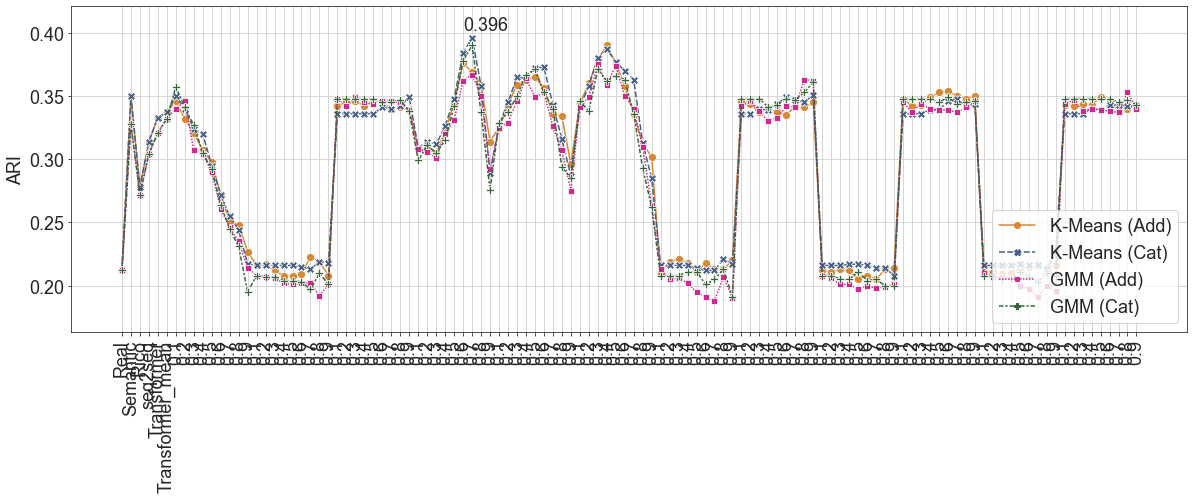

In [13]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="lower right")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
#plt.text(4, 0.128, 'Real & Semantic')
#plt.text(13, 0.128, 'Rico & Real')
#plt.text(22, 0.128, 'Rico & Semantic')
#plt.text(31, 0.128, 'Rico & seq2seq')
#plt.text(40, 0.128, 'seq2seq & Real')
#plt.text(49, 0.128, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari_34.png', format='png', bbox_inches='tight', transparent=True)

In [14]:
for k, i in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    print(k, i[0], i[1])

0 92 0.64
1 77 0.641
2 76 0.646
3 77 0.643


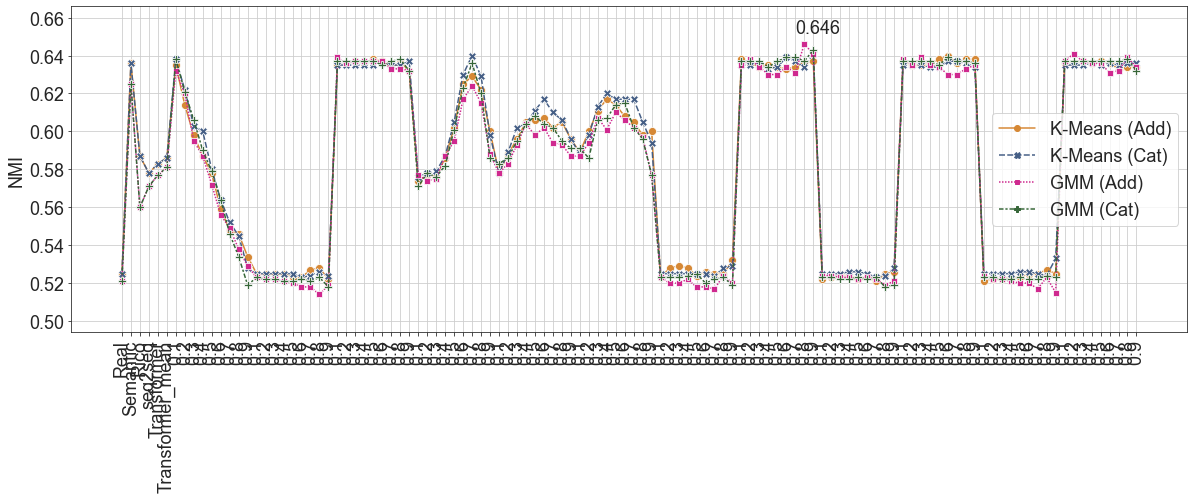

In [15]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
#plt.text(4, 0.468, 'Real & Semantic')
#plt.text(13, 0.468, 'Rico & Real')
#plt.text(22, 0.468, 'Rico & Semantic')
#plt.text(31, 0.468, 'Rico & seq2seq')
#plt.text(40, 0.468, 'seq2seq & Real')
#plt.text(49, 0.468, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    if i==2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_34.png', format='png', bbox_inches='tight', transparent=True)

In [16]:
for k, i in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    print(k, i[0], i[1])

0 54 0.513
1 39 0.512
2 40 0.498
3 39 0.508


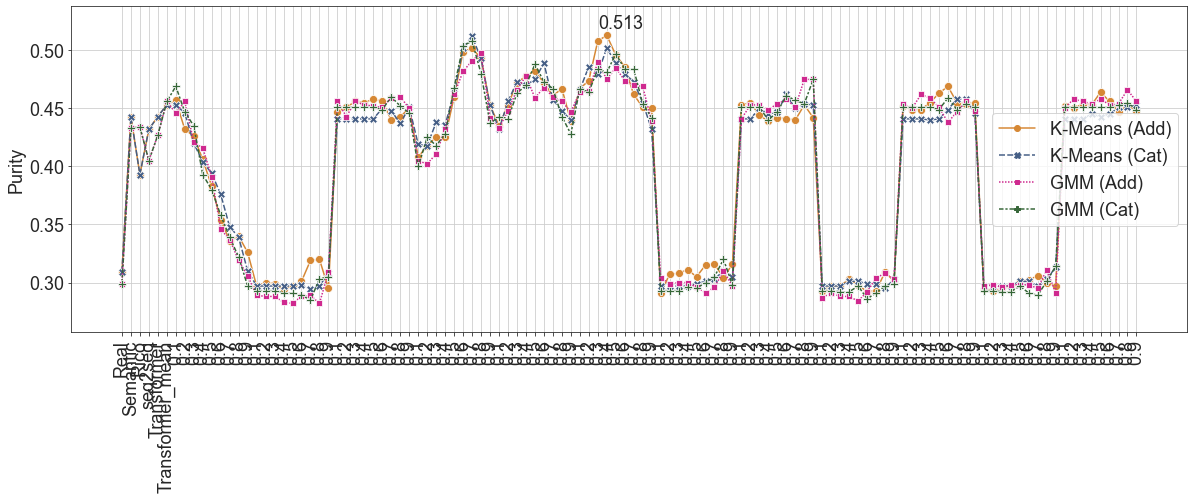

In [17]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
#plt.text(4, 0.22, 'Real & Semantic')
#plt.text(13, 0.22, 'Rico & Real')
#plt.text(22, 0.22, 'Rico & Semantic')
#plt.text(31, 0.22, 'Rico & seq2seq')
#plt.text(40, 0.22, 'seq2seq & Real')
#plt.text(49, 0.22, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    if i == 0: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_34.png', format='png', bbox_inches='tight', transparent=True)

In [18]:
labels_23 = ['C23 K-Means (Add)', 'C23 K-Means (Car)', 'C23 GMM (Add)', 'C23 GMM (Cat)']
labels_34 = ['R34 K-Means (Add)', 'R34 K-Means (Car)', 'R34 GMM (Add)', 'R34 GMM (Cat)']

df_ari_23_t = df_ari_23.copy(deep=True)
df_ari_23_t.columns = labels_23
df_ari_34_t = df_ari_34.copy(deep=True)
df_ari_34_t.columns = labels_34

df_nmi_23_t = df_nmi_23.copy(deep=True)
df_nmi_23_t.columns = labels_23
df_nmi_34_t = df_nmi_34.copy(deep=True)
df_nmi_34_t.columns = labels_34

df_purity_23_t = df_purity_23.copy(deep=True)
df_purity_23_t.columns = labels_23
df_purity_34_t = df_purity_34.copy(deep=True)
df_purity_34_t.columns = labels_34

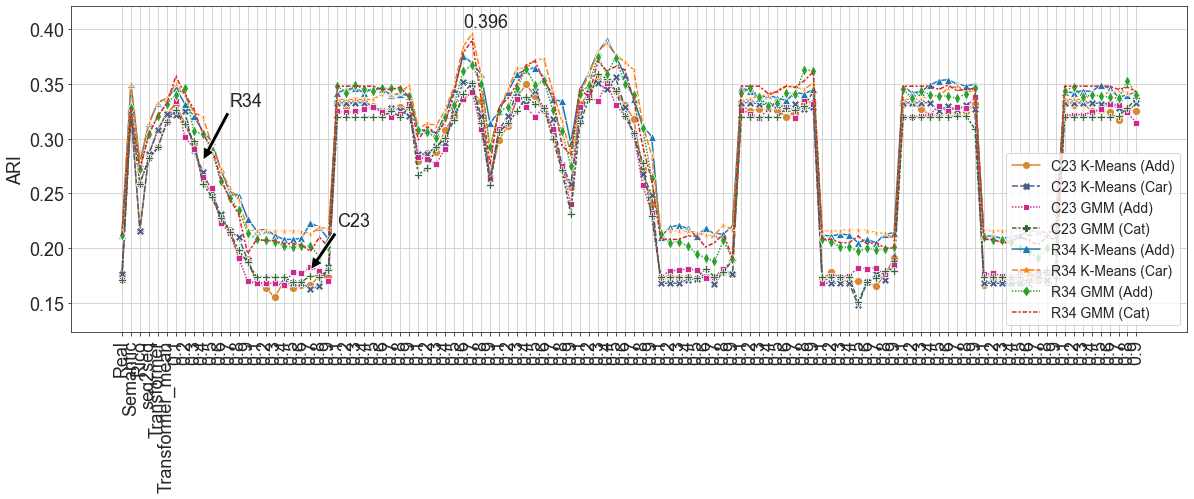

In [19]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_ari_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.28), xytext=(12, 0.33), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.18), xytext=(24, 0.22), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.096, 'Real & Semantic')
#plt.text(13, 0.096, 'Rico & Real')
#plt.text(22, 0.096, 'Rico & Semantic')
#plt.text(31, 0.096, 'Rico & seq2seq')
#plt.text(40, 0.096, 'seq2seq & Real')
#plt.text(49, 0.096, 'seq2seq & Semantic')
plt.ylim([df_ari_23_t.min().min()-0.025, df_ari_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_ari_34_t.idxmax(), df_ari_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari.png', format='png', bbox_inches='tight', transparent=True)

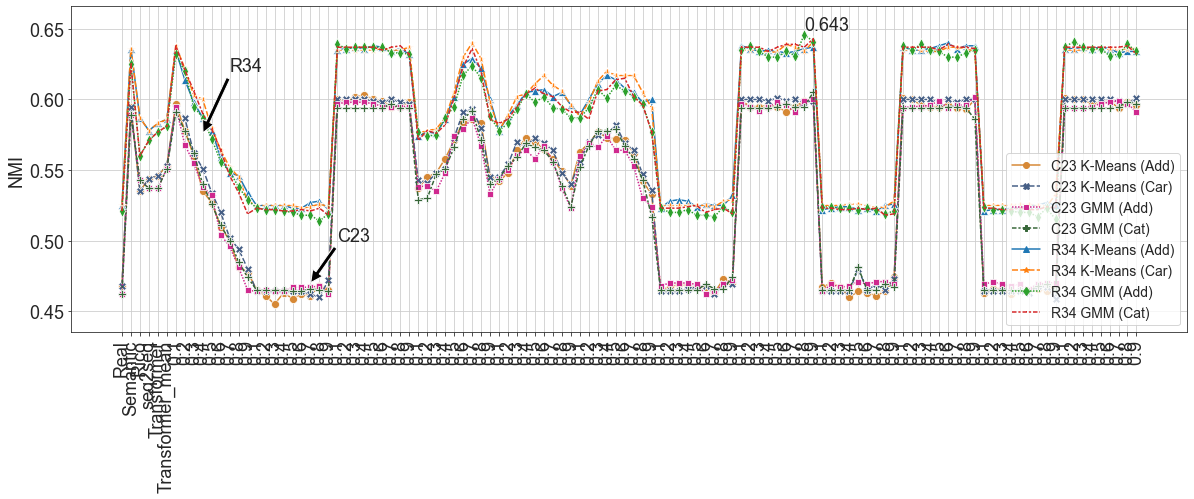

In [20]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_nmi_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.576), xytext=(12, 0.62), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.47), xytext=(24, 0.5), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.404, 'Real & Semantic')
#plt.text(13, 0.404, 'Rico & Real')
#plt.text(22, 0.404, 'Rico & Semantic')
#plt.text(31, 0.404, 'Rico & seq2seq')
#plt.text(40, 0.404, 'seq2seq & Real')
#plt.text(49, 0.404, 'seq2seq & Semantic')
plt.ylim([df_nmi_23_t.min().min()-0.02, df_nmi_34_t.max().max()+0.02])
for i, j in enumerate(zip(df_nmi_34_t.idxmax(), df_nmi_34_t.max())):
    if i==3: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi.png', format='png', bbox_inches='tight', transparent=True)


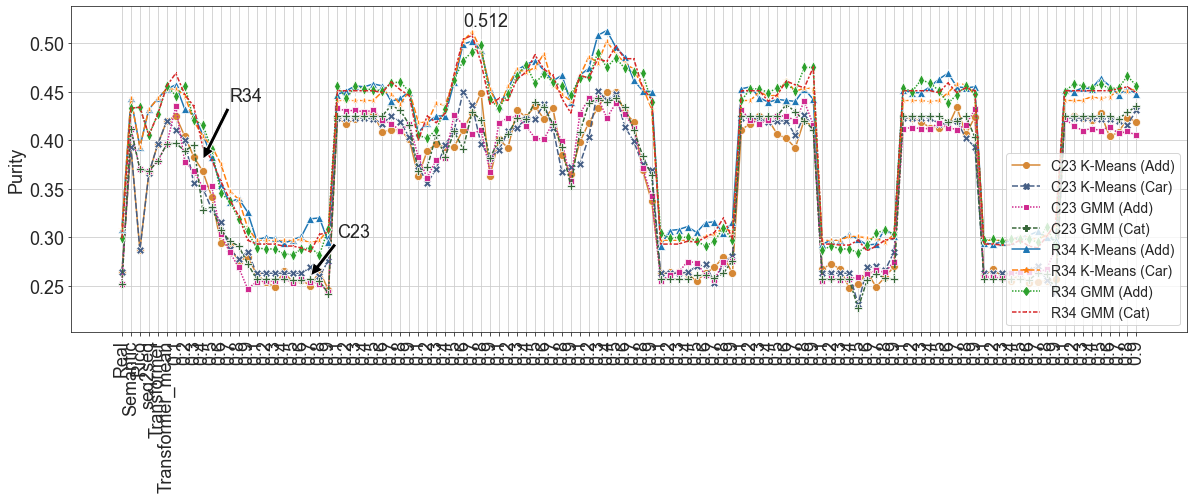

In [21]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_purity_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.38), xytext=(12, 0.44), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.26), xytext=(24, 0.3), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.154, 'Real & Semantic')
#plt.text(13, 0.154, 'Rico & Real')
#plt.text(22, 0.154, 'Rico & Semantic')
#plt.text(31, 0.154, 'Rico & seq2seq')
#plt.text(40, 0.154, 'seq2seq & Real')
#plt.text(49, 0.154, 'seq2seq & Semantic')
plt.ylim([df_purity_23_t.min().min()-0.025, df_purity_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_purity_34_t.idxmax(), df_purity_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity.png', format='png', bbox_inches='tight', transparent=True)

In [22]:
df_ari_23[0:4]['GMM (Add)']

0    0.171
1    0.323
2    0.259
3    0.282
Name: GMM (Add), dtype: float64

In [23]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq', 'Transformer', 'Transformer-mean']
df_23 = pd.DataFrame([df_ari_23[0:6]['GMM (Add)'], df_ari_23[0:6]['K-Means (Add)'], df_nmi_23[0:6]['GMM (Add)'], df_nmi_23[0:6]['K-Means (Add)'], df_purity_23[0:6]['GMM (Add)'], df_purity_23[0:6]['K-Means (Add)']])
df_23.columns = column_names
df_23 = df_23.T
df_23.columns = row_names
df_23['type'] = column_names
df_23 = pd.melt(df_23, id_vars="type", var_name="eval", value_name="eval_values")
#df_23.to_csv('../result/df_23_all.csv')

Text(0, 0.5, '')

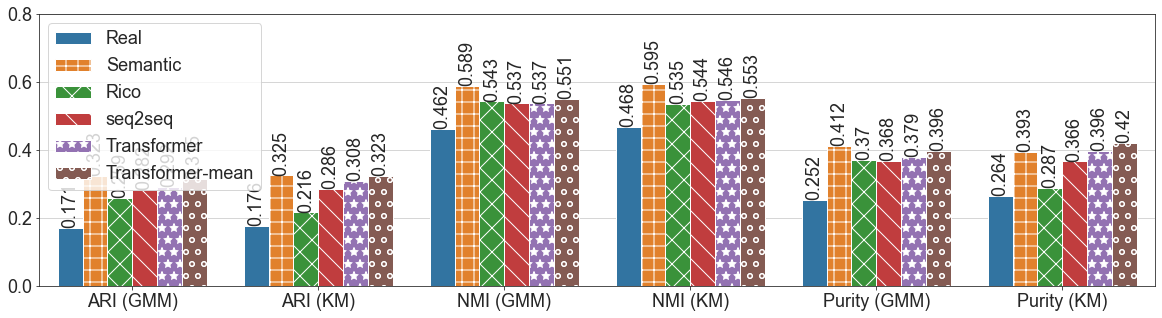

In [24]:
plt.figure(figsize=(20,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_23.png', format='png', bbox_inches='tight', transparent=True)

In [25]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq', 'Transformer', 'Transformer-mean']
df_34 = pd.DataFrame([df_ari_34[0:6]['GMM (Add)'], df_ari_34[0:6]['K-Means (Add)'], df_nmi_34[0:6]['GMM (Add)'], df_nmi_34[0:6]['K-Means (Add)'], df_purity_34[0:6]['GMM (Add)'], df_purity_34[0:6]['K-Means (Add)']])
df_34.columns = column_names
df_34 = df_34.T
df_34.columns = row_names
df_34['type'] = column_names
df_34 = pd.melt(df_34, id_vars="type", var_name="eval", value_name="eval_values")
#df_34.to_csv('../result/df_34_all.csv')

Text(0, 0.5, '')

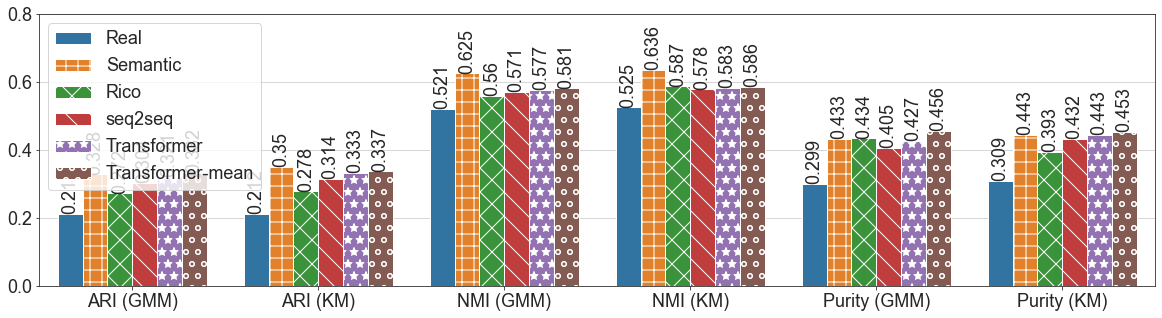

In [26]:
plt.figure(figsize=(20,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_34.png', format='png', bbox_inches='tight', transparent=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


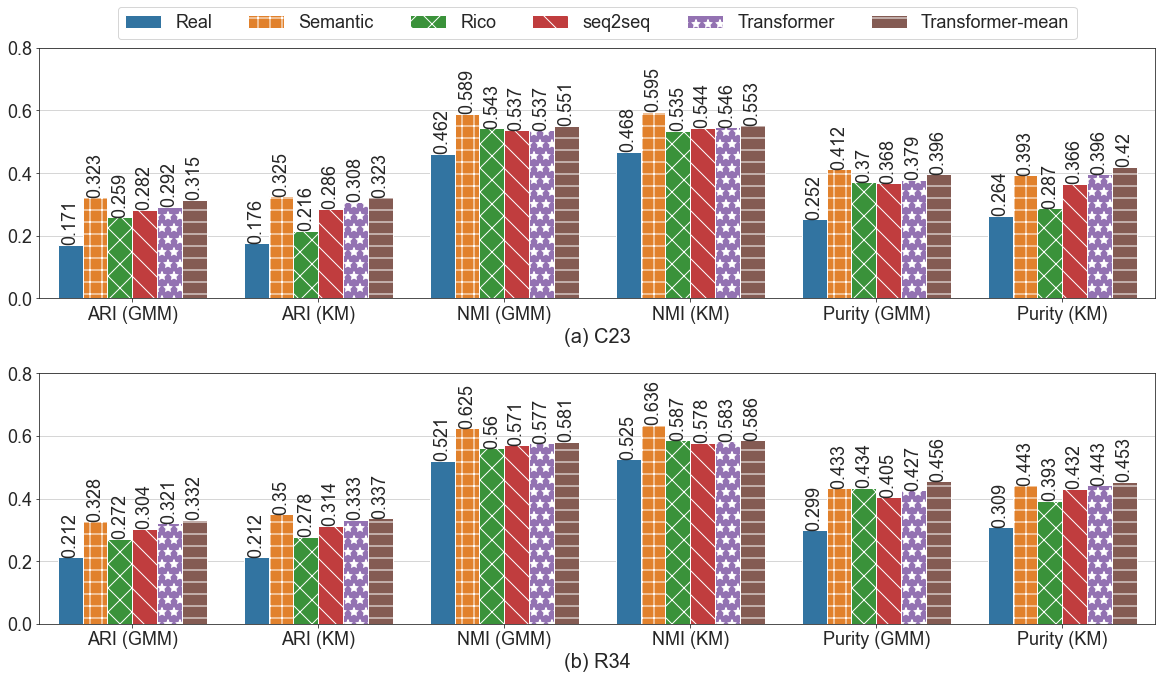

In [53]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.35, hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax1.containers:
    ax1.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', '-']
for bars, hatch in zip(ax1.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax1.get_legend().remove()
#h, l = ax1.get_legend_handles_labels()
#ax1.legend(h[0:], l[0:], loc="upper center", ncol=5)
plt.ylim((0, 0.8))
plt.xlabel('(a) C23', fontsize=20)
plt.ylabel(None)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax2.containers:
    ax2.bar_label(container, rotation=90)
for bars, hatch in zip(ax2.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax2.get_legend().remove()
plt.ylim((0, 0.8))
plt.xlabel('(b) R34', fontsize=20)
plt.ylabel(None)
plt.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, 2.5))
plt.savefig('../result/plot_single_transformer.png', format='png', bbox_inches='tight', transparent=True)
plt.savefig('../result/plot_single_transformer.eps', format='eps', bbox_inches='tight')

In [28]:
df_ari_23_x = df_ari_23.copy()
df_ari_23_x['label'] = labels_x
df_ari_23_x.set_index('label', inplace=True)
df_ari_23_x.head(6)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.176,0.176,0.171,0.171
Semantic,0.325,0.325,0.323,0.323
Rico,0.216,0.216,0.259,0.259
seq2seq,0.286,0.286,0.282,0.282
Transformer,0.308,0.308,0.292,0.292
Transformer_mean,0.323,0.323,0.315,0.315


In [29]:
df_nmi_23_x = df_nmi_23.copy()
df_nmi_23_x['label'] = labels_x
df_nmi_23_x.set_index('label', inplace=True)
df_nmi_23_x.head(6)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.468,0.468,0.462,0.462
Semantic,0.595,0.595,0.589,0.589
Rico,0.535,0.535,0.543,0.543
seq2seq,0.544,0.544,0.537,0.537
Transformer,0.546,0.546,0.537,0.537
Transformer_mean,0.553,0.553,0.551,0.551


In [30]:
df_purity_23_x = df_purity_23.copy()
df_purity_23_x['label'] = labels_x
df_purity_23_x.set_index('label', inplace=True)
df_purity_23_x.head(6)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.264,0.264,0.252,0.252
Semantic,0.393,0.393,0.412,0.412
Rico,0.287,0.287,0.370,0.370
seq2seq,0.366,0.366,0.368,0.368
Transformer,0.396,0.396,0.379,0.379
Transformer_mean,0.420,0.420,0.396,0.396


In [31]:
df_ari_34_x = df_ari_34.copy()
df_ari_34_x['label'] = labels_x
df_ari_34_x.set_index('label', inplace=True)
df_ari_34_x.head(6)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.212,0.212,0.212,0.212
Semantic,0.350,0.350,0.328,0.328
Rico,0.278,0.278,0.272,0.272
seq2seq,0.314,0.314,0.304,0.304
Transformer,0.333,0.333,0.321,0.321
Transformer_mean,0.337,0.337,0.332,0.332


In [32]:
df_nmi_34_x = df_nmi_34.copy()
df_nmi_34_x['label'] = labels_x
df_nmi_34_x.set_index('label', inplace=True)
df_nmi_34_x.head(6)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.525,0.525,0.521,0.521
Semantic,0.636,0.636,0.625,0.625
Rico,0.587,0.587,0.560,0.560
seq2seq,0.578,0.578,0.571,0.571
Transformer,0.583,0.583,0.577,0.577
Transformer_mean,0.586,0.586,0.581,0.581


In [33]:
df_purity_34_x = df_purity_34.copy()
df_purity_34_x['label'] = labels_x
df_purity_34_x.set_index('label', inplace=True)
df_purity_34_x.head(6)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.309,0.309,0.299,0.299
Semantic,0.443,0.443,0.433,0.433
Rico,0.393,0.393,0.434,0.434
seq2seq,0.432,0.432,0.405,0.405
Transformer,0.443,0.443,0.427,0.427
Transformer_mean,0.453,0.453,0.456,0.456


In [34]:
print(df_ari_23_x[42:51].max())
print(df_ari_23_x[51:60].max())
print(df_ari_23_x[78:87].max())
print(df_ari_23_x[87:96].max())
print(df_ari_23_x[96:105].max())
print(df_ari_23_x[105:114].max())

K-Means (Add)    0.350
K-Means (Cat)    0.344
GMM (Add)        0.336
GMM (Cat)        0.338
dtype: float64
K-Means (Add)    0.354
K-Means (Cat)    0.356
GMM (Add)        0.351
GMM (Cat)        0.359
dtype: float64
K-Means (Add)    0.191
K-Means (Cat)    0.186
GMM (Add)        0.185
GMM (Cat)        0.179
dtype: float64
K-Means (Add)    0.333
K-Means (Cat)    0.333
GMM (Add)        0.338
GMM (Cat)        0.321
dtype: float64
K-Means (Add)    0.181
K-Means (Cat)    0.175
GMM (Add)        0.182
GMM (Cat)        0.180
dtype: float64
K-Means (Add)    0.333
K-Means (Cat)    0.333
GMM (Add)        0.332
GMM (Cat)        0.337
dtype: float64


In [35]:
print(df_nmi_23_x[42:51].max())
print(df_nmi_23_x[51:60].max())
print(df_nmi_23_x[78:87].max())
print(df_nmi_23_x[87:96].max())
print(df_nmi_23_x[96:105].max())
print(df_nmi_23_x[105:114].max())

K-Means (Add)    0.573
K-Means (Cat)    0.573
GMM (Add)        0.567
GMM (Cat)        0.569
dtype: float64
K-Means (Add)    0.577
K-Means (Cat)    0.582
GMM (Add)        0.574
GMM (Cat)        0.579
dtype: float64
K-Means (Add)    0.474
K-Means (Cat)    0.480
GMM (Add)        0.471
GMM (Cat)        0.481
dtype: float64
K-Means (Add)    0.601
K-Means (Cat)    0.600
GMM (Add)        0.602
GMM (Cat)        0.595
dtype: float64
K-Means (Add)    0.469
K-Means (Cat)    0.468
GMM (Add)        0.471
GMM (Cat)        0.469
dtype: float64
K-Means (Add)    0.601
K-Means (Cat)    0.601
GMM (Add)        0.599
GMM (Cat)        0.598
dtype: float64


In [36]:
print(df_purity_23_x[42:51].max())
print(df_purity_23_x[51:60].max())
print(df_purity_23_x[78:87].max())
print(df_purity_23_x[87:96].max())
print(df_purity_23_x[96:105].max())
print(df_purity_23_x[105:114].max())

K-Means (Add)    0.435
K-Means (Cat)    0.437
GMM (Add)        0.424
GMM (Cat)        0.439
dtype: float64
K-Means (Add)    0.450
K-Means (Cat)    0.451
GMM (Add)        0.444
GMM (Cat)        0.443
dtype: float64
K-Means (Add)    0.273
K-Means (Cat)    0.285
GMM (Add)        0.275
GMM (Cat)        0.262
dtype: float64
K-Means (Add)    0.434
K-Means (Cat)    0.423
GMM (Add)        0.432
GMM (Cat)        0.425
dtype: float64
K-Means (Add)    0.267
K-Means (Cat)    0.270
GMM (Add)        0.289
GMM (Cat)        0.263
dtype: float64
K-Means (Add)    0.428
K-Means (Cat)    0.431
GMM (Add)        0.422
GMM (Cat)        0.435
dtype: float64


In [37]:
print(df_ari_34_x[42:51].max())
print(df_ari_34_x[51:60].max())
print(df_ari_34_x[78:87].max())
print(df_ari_34_x[87:96].max())
print(df_ari_34_x[96:105].max())
print(df_ari_34_x[105:114].max())

K-Means (Add)    0.365
K-Means (Cat)    0.373
GMM (Add)        0.364
GMM (Cat)        0.371
dtype: float64
K-Means (Add)    0.390
K-Means (Cat)    0.387
GMM (Add)        0.375
GMM (Cat)        0.371
dtype: float64
K-Means (Add)    0.214
K-Means (Cat)    0.217
GMM (Add)        0.208
GMM (Cat)        0.211
dtype: float64
K-Means (Add)    0.354
K-Means (Cat)    0.348
GMM (Add)        0.346
GMM (Cat)        0.349
dtype: float64
K-Means (Add)    0.216
K-Means (Cat)    0.227
GMM (Add)        0.210
GMM (Cat)        0.211
dtype: float64
K-Means (Add)    0.349
K-Means (Cat)    0.343
GMM (Add)        0.353
GMM (Cat)        0.348
dtype: float64


In [38]:
print(df_nmi_34_x[42:51].max())
print(df_nmi_34_x[51:60].max())
print(df_nmi_34_x[78:87].max())
print(df_nmi_34_x[87:96].max())
print(df_nmi_34_x[96:105].max())
print(df_nmi_34_x[105:114].max())

K-Means (Add)    0.607
K-Means (Cat)    0.617
GMM (Add)        0.604
GMM (Cat)        0.608
dtype: float64
K-Means (Add)    0.617
K-Means (Cat)    0.620
GMM (Add)        0.610
GMM (Cat)        0.615
dtype: float64
K-Means (Add)    0.526
K-Means (Cat)    0.528
GMM (Add)        0.524
GMM (Cat)        0.523
dtype: float64
K-Means (Add)    0.640
K-Means (Cat)    0.637
GMM (Add)        0.639
GMM (Cat)        0.639
dtype: float64
K-Means (Add)    0.527
K-Means (Cat)    0.533
GMM (Add)        0.524
GMM (Cat)        0.524
dtype: float64
K-Means (Add)    0.637
K-Means (Cat)    0.636
GMM (Add)        0.641
GMM (Cat)        0.638
dtype: float64


In [39]:
print(df_purity_34_x[42:51].max())
print(df_purity_34_x[51:60].max())
print(df_purity_34_x[78:87].max())
print(df_purity_34_x[87:96].max())
print(df_purity_34_x[96:105].max())
print(df_purity_34_x[105:114].max())

K-Means (Add)    0.482
K-Means (Cat)    0.489
GMM (Add)        0.478
GMM (Cat)        0.488
dtype: float64
K-Means (Add)    0.513
K-Means (Cat)    0.502
GMM (Add)        0.490
GMM (Cat)        0.497
dtype: float64
K-Means (Add)    0.309
K-Means (Cat)    0.303
GMM (Add)        0.308
GMM (Cat)        0.299
dtype: float64
K-Means (Add)    0.469
K-Means (Cat)    0.458
GMM (Add)        0.462
GMM (Cat)        0.459
dtype: float64
K-Means (Add)    0.306
K-Means (Cat)    0.313
GMM (Add)        0.311
GMM (Cat)        0.314
dtype: float64
K-Means (Add)    0.464
K-Means (Cat)    0.453
GMM (Add)        0.466
GMM (Cat)        0.455
dtype: float64


In [40]:
df_ari_23_a = df_ari_23.copy()
df_ari_23_a['label'] = labels_a
df_ari_23_a.set_index('label', inplace=True)
#df_ari_23_a.head(5)
print(df_ari_23_a['K-Means (Add)'].nlargest(n=5), df_ari_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_23_a['GMM (Add)'].nlargest(n=5), df_ari_23_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Transformer_mean 0.3    0.354
Rico & Transformer 0.4         0.350
Rico & Transformer_mean 0.4    0.350
Rico & Transformer_mean 0.5    0.344
Rico & seq2seq 0.7             0.343
Name: K-Means (Add), dtype: float64 label
Rico & Transformer_mean 0.5    0.356
Rico & seq2seq 0.6             0.352
Rico & Transformer_mean 0.3    0.351
Rico & seq2seq 0.7             0.350
Rico & Transformer_mean 0.2    0.345
Name: K-Means (Cat), dtype: float64
label
Rico & Transformer_mean 0.4    0.351
Rico & seq2seq 0.7             0.343
Rico & Transformer_mean 0.2    0.339
Transformer & Semantic 0.9     0.338
Rico & seq2seq 0.6             0.336
Name: GMM (Add), dtype: float64 label
Rico & Transformer_mean 0.3    0.359
Rico & Transformer_mean 0.4    0.355
Rico & seq2seq 0.7             0.351
Rico & Transformer_mean 0.5    0.344
seq2seq & Semantic 0.9         0.343
Name: GMM (Cat), dtype: float64


In [41]:
df_ari_34_a = df_ari_34.copy()
df_ari_34_a['label'] = labels_a
df_ari_34_a.set_index('label', inplace=True)
print(df_ari_34_a['K-Means (Add)'].nlargest(n=5), df_ari_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_34_a['GMM (Add)'].nlargest(n=5), df_ari_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Transformer_mean 0.4    0.390
Rico & Transformer_mean 0.3    0.379
Rico & seq2seq 0.6             0.376
Rico & Transformer_mean 0.5    0.376
Rico & seq2seq 0.7             0.369
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.7             0.396
Rico & Transformer_mean 0.4    0.387
Rico & seq2seq 0.6             0.384
Rico & Transformer_mean 0.3    0.380
Rico & Transformer_mean 0.5    0.377
Name: K-Means (Cat), dtype: float64
label
Rico & Transformer_mean 0.3    0.375
Rico & Transformer_mean 0.5    0.374
Rico & seq2seq 0.7             0.367
Rico & Transformer 0.4         0.364
seq2seq & Semantic 0.8         0.363
Name: GMM (Add), dtype: float64 label
Rico & seq2seq 0.7             0.390
Rico & seq2seq 0.6             0.378
Rico & Transformer 0.5         0.371
Rico & Transformer_mean 0.3    0.371
Rico & Transformer 0.4         0.367
Name: GMM (Cat), dtype: float64


In [42]:
df_nmi_23_a = df_nmi_23.copy()
df_nmi_23_a['label'] = labels_a
df_nmi_23_a.set_index('label', inplace=True)
print(df_nmi_23_a['K-Means (Add)'].nlargest(n=5), df_nmi_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_23_a['GMM (Add)'].nlargest(n=5), df_nmi_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_nmi_34_a = df_nmi_34.copy()
df_nmi_34_a['label'] = labels_a
df_nmi_34_a.set_index('label', inplace=True)
print(df_nmi_34_a['K-Means (Add)'].nlargest(n=5), df_nmi_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_34_a['GMM (Add)'].nlargest(n=5), df_nmi_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Semantic 0.4                0.603
Rico & Semantic 0.3                0.602
Transformer & Semantic 0.1         0.601
Transformer_mean & Semantic 0.1    0.601
Rico & Semantic 0.1                0.600
Name: K-Means (Add), dtype: float64 label
seq2seq & Semantic 0.5             0.601
Transformer_mean & Semantic 0.9    0.601
Rico & Semantic 0.1                0.600
Rico & Semantic 0.2                0.600
Rico & Semantic 0.3                0.600
Name: K-Means (Cat), dtype: float64
label
Transformer & Semantic 0.9         0.602
seq2seq & Semantic 0.9             0.600
seq2seq & Semantic 0.8             0.599
Transformer & Semantic 0.5         0.599
Transformer_mean & Semantic 0.7    0.599
Name: GMM (Add), dtype: float64 label
seq2seq & Semantic 0.9             0.605
Transformer_mean & Semantic 0.8    0.598
Rico & Semantic 0.7                0.597
seq2seq & Semantic 0.6             0.597
Transformer_mean & Semantic 0.9    0.597
Name: GMM (Cat), dtype: float64
--
label
Transformer

In [43]:
df_purity_23_a = df_purity_23.copy()
df_purity_23_a['label'] = labels_a
df_purity_23_a.set_index('label', inplace=True)
print(df_purity_23_a['K-Means (Add)'].nlargest(n=5), df_purity_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_23_a['GMM (Add)'].nlargest(n=5), df_purity_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_purity_34_a = df_purity_34.copy()
df_purity_34_a['label'] = labels_a
df_purity_34_a.set_index('label', inplace=True)
print(df_purity_34_a['K-Means (Add)'].nlargest(n=5), df_purity_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_34_a['GMM (Add)'].nlargest(n=5), df_purity_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Transformer_mean 0.4    0.450
Rico & Transformer_mean 0.5    0.450
Rico & seq2seq 0.8             0.449
Rico & Transformer 0.5         0.435
Transformer & Semantic 0.7     0.434
Name: K-Means (Add), dtype: float64 label
Rico & Transformer_mean 0.3    0.451
Rico & seq2seq 0.6             0.450
Rico & Transformer_mean 0.5    0.448
Rico & Transformer_mean 0.4    0.441
Rico & Transformer 0.6         0.437
Name: K-Means (Cat), dtype: float64
label
Rico & Transformer_mean 0.3    0.444
Rico & Transformer_mean 0.2    0.443
seq2seq & Semantic 0.8         0.440
Rico & Transformer_mean 0.5    0.438
Real & Semantic 0.1            0.435
Name: GMM (Add), dtype: float64 label
Rico & Transformer_mean 0.3    0.443
Rico & Transformer_mean 0.5    0.443
Rico & Transformer 0.5         0.439
Rico & Transformer_mean 0.4    0.439
Rico & Transformer_mean 0.2    0.438
Name: GMM (Cat), dtype: float64
--
label
Rico & Transformer_mean 0.4    0.513
Rico & Transformer_mean 0.3    0.508
Rico & seq2seq 0.

In [44]:
mean_name = ['Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'Rico & Transformer', 'Rico & Transformer-Mean', 'seq2seq & Real', 'seq2seq & Semantic', 'Transformer & Real', 'Transformer & Semantic', 'Transformer-Mean & Real', 'Transformer-Mean & Semantic']
type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_mean = pd.DataFrame([df_ari_23_a[6:15].mean(), df_ari_23_a[15:24].mean(),  df_ari_23_a[24:33].mean(), df_ari_23_a[33:42].mean(), df_ari_23_a[42:51].mean(), df_ari_23_a[51:60].mean(), df_ari_23_a[60:69].mean(), df_ari_23_a[69:78].mean(), df_ari_23_a[78:87].mean(), df_ari_23_a[87:96].mean(), df_ari_23_a[96:105].mean(), df_ari_23_a[105:114].mean()])
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
df_ari_23_mm = df_ari_23_mm.T
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[6:15].mean(), df_nmi_23_a[15:24].mean(),  df_nmi_23_a[24:33].mean(), df_nmi_23_a[33:42].mean(), df_nmi_23_a[42:51].mean(), df_nmi_23_a[51:60].mean(), df_nmi_23_a[60:69].mean(), df_nmi_23_a[69:78].mean(), df_nmi_23_a[78:87].mean(), df_nmi_23_a[87:96].mean(), df_nmi_23_a[96:105].mean(), df_nmi_23_a[105:114].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[6:15].mean(), df_purity_23_a[15:24].mean(),  df_purity_23_a[24:33].mean(), df_purity_23_a[33:42].mean(), df_purity_23_a[42:51].mean(), df_purity_23_a[51:60].mean(), df_purity_23_a[60:69].mean(), df_purity_23_a[69:78].mean(), df_purity_23_a[78:87].mean(), df_purity_23_a[87:96].mean(), df_purity_23_a[96:105].mean(), df_purity_23_a[105:114].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[6:15].mean(), df_ari_34_a[15:24].mean(),  df_ari_34_a[24:33].mean(), df_ari_34_a[33:42].mean(), df_ari_34_a[42:51].mean(), df_ari_34_a[51:60].mean(), df_ari_34_a[60:69].mean(), df_ari_34_a[69:78].mean(), df_ari_34_a[78:87].mean(), df_ari_34_a[87:96].mean(), df_ari_34_a[96:105].mean(), df_ari_34_a[105:114].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[6:15].mean(), df_nmi_34_a[15:24].mean(),  df_nmi_34_a[24:33].mean(), df_nmi_34_a[33:42].mean(), df_nmi_34_a[42:51].mean(), df_nmi_34_a[51:60].mean(), df_nmi_34_a[60:69].mean(), df_nmi_34_a[69:78].mean(), df_nmi_34_a[78:87].mean(), df_nmi_34_a[87:96].mean(), df_nmi_34_a[96:105].mean(), df_nmi_34_a[105:114].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[6:15].mean(), df_purity_34_a[15:24].mean(),  df_purity_34_a[24:33].mean(), df_purity_34_a[33:42].mean(), df_purity_34_a[42:51].mean(), df_purity_34_a[51:60].mean(), df_purity_34_a[60:69].mean(), df_purity_34_a[69:78].mean(), df_purity_34_a[78:87].mean(), df_purity_34_a[87:96].mean(), df_purity_34_a[96:105].mean(), df_purity_34_a[105:114].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")


C:\Users\admin\AppData\Local\Temp\ipykernel_20204\269054819.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
C:\Users\admin\AppData\Local\Temp\ipykernel_20204\269054819.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
C:\Users\admin\AppData\Local\Temp\ipykernel_20204\269054819.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_purity_23_mm = pd.DataFrame([df_purity_23_m

In [64]:
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

Text(0, 0.5, 'ARI')

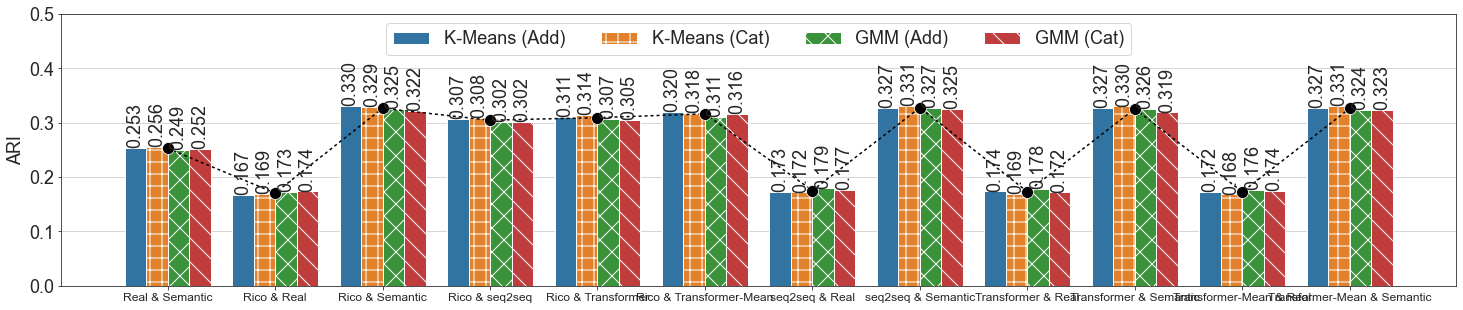

In [65]:
plt.figure(figsize=(25,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_23_mean, hue='type')
sns.lineplot(data=df_ari_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper center", bbox_to_anchor=(.5, 1), ncol=4)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_23_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'NMI')

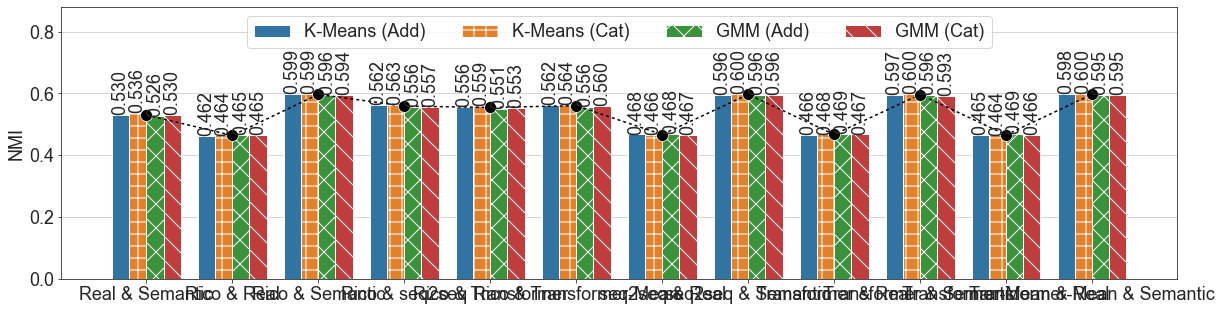

In [46]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_23_mean, hue='type')
sns.lineplot(data=df_nmi_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.88))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_23_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Purity')

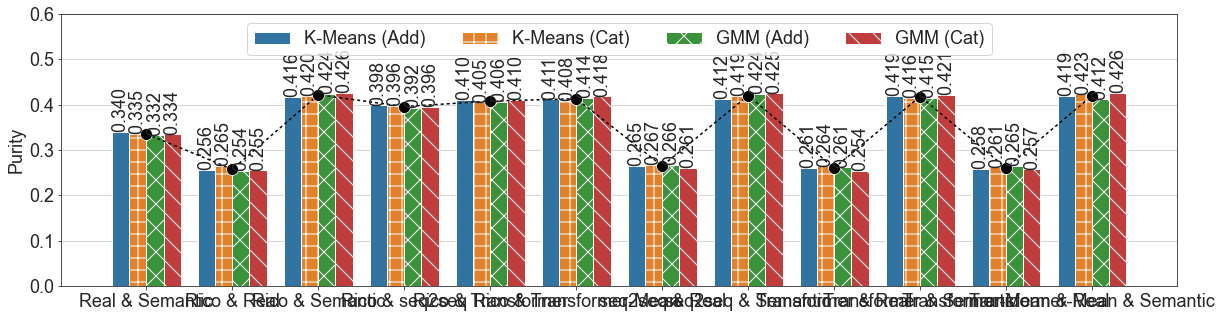

In [47]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_23_mean, hue='type')
sns.lineplot(data=df_purity_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.6))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_23_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'ARI')

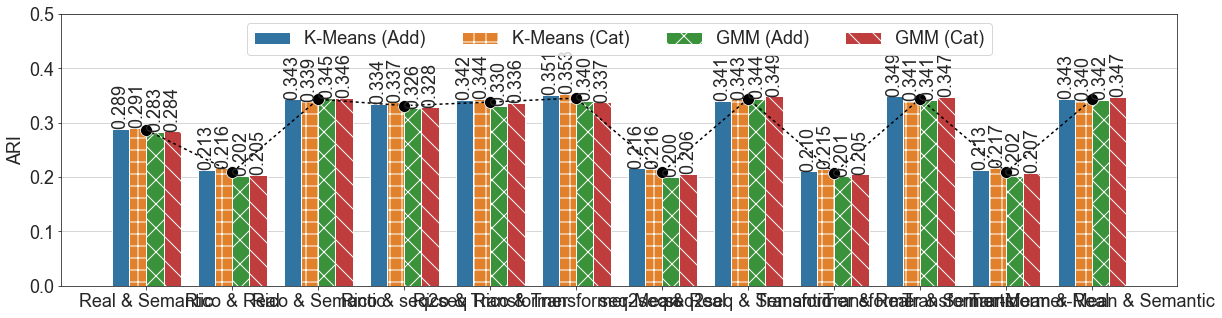

In [48]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_34_mean, hue='type')
sns.lineplot(data=df_ari_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_34_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'NMI')

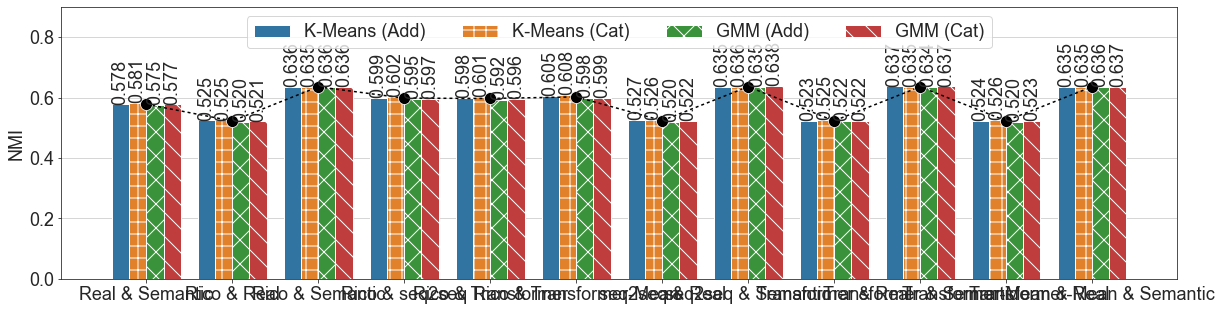

In [49]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_34_mean, hue='type')
sns.lineplot(data=df_nmi_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.9))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_34_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Purity')

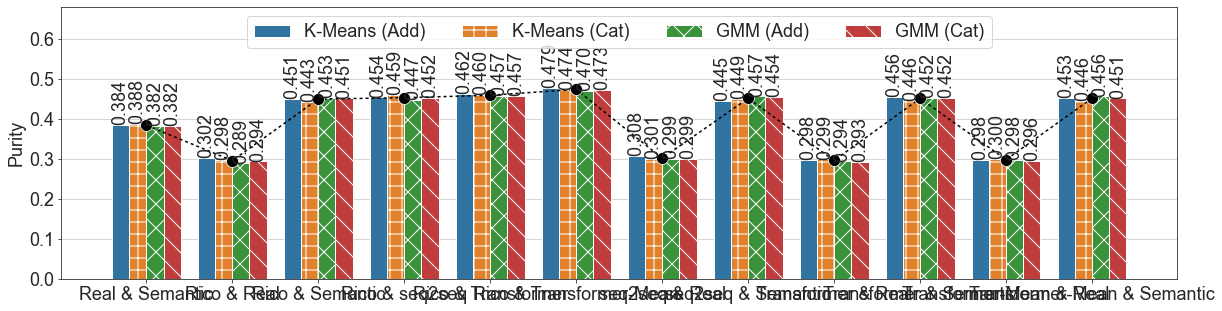

In [50]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_34_mean, hue='type')
sns.lineplot(data=df_purity_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.68))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_34_mean.png', format='png', bbox_inches='tight', transparent=True)